In [202]:
import random
from matplotlib import pyplot as plt
import numpy as np
from copy import deepcopy
from math import sqrt

In [324]:
STATES = 7
EPISODES = 100
RUNS = 10
GAMMA = 1

In [191]:
def walk(start):
    trajectory = []
    s = start
    while(True):
        a  = 1 if random.randint(0,1) == 1 else -1
        #append state, action, reward, only reward if get to far right terminal state
        sPrime = s + a
        trajectory.append([s,a,1 if sPrime == STATES-1 else 0,sPrime])
        s = sPrime
        if s == 0 or s == STATES-1:
            break
    return trajectory

In [192]:
nonTerminalStates = (1,2,3,4,5)
#Tabular TD(0) for estimating v(pi)
# V = np.random.rand(STATES)
# V[0] = 0
# V[-1] = 0
V = [0,0.5,0.5,0.5,0.5,0.5,0]
alpha = .1
recordedEpisodes = [0,1,10,100]
recordings = [deepcopy(V[1:len(V)-1])]


for i in range(EPISODES):
    start = 3
    trajectory = walk(start)
    for step in trajectory:
        s, a, r, sPrime = step[0],step[1],step[2],step[3]
        V[s] = V[s] + alpha * (r + (GAMMA*V[sPrime]) - V[s])
    if i+1 in recordedEpisodes:
        recordings.append(deepcopy(V[1:len(V)-1]))

[[0.5, 0.5, 0.5, 0.5, 0.5], [0.45, 0.5, 0.5, 0.5, 0.5], [0.28326806533240856, 0.4154396816141295, 0.4637916798065426, 0.5080244743880313, 0.6355000000000001], [0.10545096119187003, 0.4706078625682837, 0.5670227217417747, 0.7409273716835372, 0.8668059643876969]]


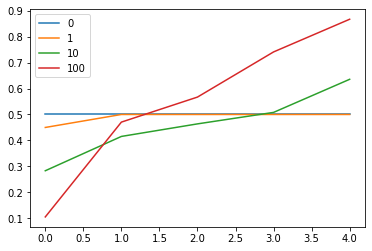

In [193]:
print(recordings)
for recording,runNum in zip(recordings,recordedEpisodes):  
    plt.plot(recording,label=runNum)
    plt.legend(recordedEpisodes)    
plt.show()

In [215]:
def rms(numbers,expecteds):
    total = 0
    for number,expected in zip(numbers,expecteds):
        total+=(numbeer-expected)**2
    return sqrt((1/len(numbers)) * total)

In [314]:
def td(episodes,alpha,V):
    Vts = []
    for _ in range(episodes):
        start = 3
        trajectory = walk(start)
        for step in trajectory:
            s, a, r, sPrime = step[0],step[1],step[2],step[3]
            V[s] = V[s] + alpha * (r + (GAMMA*V[sPrime]) - V[s])
        Vts.append(rms(V[1:len(V)-1],VPi))
    return Vts


In [236]:
def mcFirst(episodes,alpha,V):
    Vts = []
    returns = [[],[],[],[],[],[],[]]
    for _ in range(episodes):
        start = 3
        trajectory = walk(start)
        G = 0
        seen = [False,False,False,False,False,False,False,False]
        for i,step in enumerate(reversed(trajectory)):
            s, r = step[0],step[2]
            G = G * GAMMA + r
            if seen[s] == False:
                returns[s].append(G)
                V[s] = sum(returns[s])/len(returns[s])
                seen[s] = True
        Vts.append(deepcopy(V[1:len(V)-1]))
    return Vts
    
            



In [290]:
VPi = ((1/6),(2/6),(3/6),(4/6),(5/6))
def mcEvery(episodes, alpha, V):
    Vts = []
    for _ in range(episodes):
        start = 3
        trajectory = walk(start)
        G = 0
        for i, step in enumerate(reversed(trajectory)):
            s, r = step[0],step[2]
            G = G * GAMMA + r
            V[s] = V[s] + alpha*(G - V[s]) 
        Vts.append(rms((V[1:len(V)-1]),VPi))
    return Vts



7it [00:08,  1.21s/it]


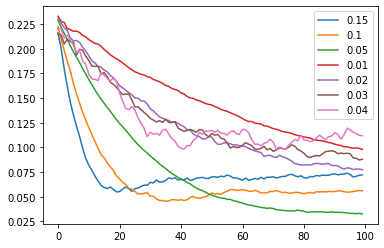

In [325]:
VPi = ((1/6),(2/6),(3/6),(4/6),(5/6))
from tqdm import tqdm
lines = []
alphas = [.15,.1,.05, .01,.02,.03,.04]
evaluations = ['TD','TD','TD','MC','MC','MC','MC']
for alpha,evaluation in tqdm(zip(alphas,evaluations)):
    averageRun = np.zeros(EPISODES)
    for i in range(RUNS):
        V = [0,0.5,0.5,0.5,0.5,0.5,0]
        if (evaluation == 'TD'):
            run = td(EPISODES,alpha,V)
        elif (evaluation == 'MC'):
            run = mcEvery(EPISODES,alpha,V)
        for i in range(len(run)):
            averageRun[i] += (1/(i+1) * (run[i] - averageRun[i]))
    lines.append(averageRun)

for line,alpha in zip(lines,alphas):  
    plt.plot(line,label=alpha)
plt.legend(alphas)    
plt.show()



    